# TODO: 
* drop all rows with any nans
* remove countries with less than 5 years of data
* do overall statistics, plot top X suicides in horizontal bar (or just do all of them)
* plot mean suicide rate per year globally over time. 
* think of nice machine learning things to do....


# Summary
In this notebook we'll look at some average statistics, averaged over our entire date range (from 1985 to 2015)

# The data

This notebook uses suicide statistics data from XXX, providing number of suicides and population sizes split by age ranges and gender, spanning the years 1985-2014 (2015 and 2016 are also included but a lot of data is missing so I mostly left out these two years). I also use population data from XXX to fill in some missing population valuesin the suicide statistics data. Finally, some meta data from XXX is used

In [13]:
INPUT_FILE = '../data/processed/enriched_df.csv'
META_DATA = '../data/processed/cleaned_meta.csv'
CHOROPLETH_DATA_FILE = '../data/processed/choropleth_df.csv'
RAW = '../data/raw/who_suicide_statistics.csv'

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read in data

In [69]:
df_with_age = pd.read_csv(INPUT_FILE)

In [70]:
df_with_age.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [77]:
df = pd.read_csv(CHOROPLETH_DATA_FILE)
df.head()

,year,sex,country,suicides_no,population,"suicides per 100,000",code
0,1979,female,Argentina,508.0,12532000.0,4.05,ARG
1,1979,female,Australia,479.0,6641600.0,7.21,AUS
2,1979,female,Austria,0.0,3742700.0,0.00,AUT
3,1979,female,Bahamas,0.0,95800.0,0.00,BHS
4,1979,female,Barbados,0.0,119800.0,0.00,BRB


In [31]:
raw = pd.read_csv(RAW)

In [32]:
raw.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


# Tables with highest and lowest suicide rates

Here we aggregate our statistics over all age groups, to get an idea of the total suicide rate per country. We'll look at male, female, and combined suicide rates and sort them across our entire dataset (from 1985 to 2014) as well as just in 2014 to look at more recent statistics

In [73]:
raw.loc[raw["country"] == "Russian Federation"].isnull().sum()#, "population"]

country         0
year            0
sex             0
age             0
suicides_no    24
population      0
dtype: int64

In [67]:
raw[(raw["country"] == "Bermuda") & (raw["population"].isnull())].head(12)

,country,year,sex,age,suicides_no,population
5640,Bermuda,1984,female,15-24 years,0.0,NaN
5641,Bermuda,1984,female,25-34 years,0.0,NaN
5642,Bermuda,1984,female,35-54 years,0.0,NaN
5643,Bermuda,1984,female,5-14 years,0.0,NaN
5644,Bermuda,1984,female,55-74 years,0.0,NaN
5645,Bermuda,1984,female,75+ years,0.0,NaN
5646,Bermuda,1984,male,15-24 years,0.0,NaN
5647,Bermuda,1984,male,25-34 years,2.0,NaN
5648,Bermuda,1984,male,35-54 years,1.0,NaN
5649,Bermuda,1984,male,5-14 years,0.0,NaN


In [78]:
nonull = df.dropna(how='any')

In [79]:
len(df)

7086

In [80]:
len(nonull)

6864

In [81]:
# first, get total suicide numbers per country per year
# create data sets with overall suicides rates, as well as tables just for males and females.
per_country_year = df.groupby(['country']).agg({'suicides_no':'sum', 'population': 'sum'} 
                                                ).reset_index()



# per_country_year.loc[per_country_year["population"] == 0, "population"] = np.nan
# per_country_year["suicides per 100,000"] = per_country_year['suicides_no'] / per_country_year['population'] * 100000 


# # # create data sets with overall suicides rates, as well as tables just for males and females.
# overall = per_country_year.groupby(['country']).agg(mean_pop = pd.NamedAgg(column="population", aggfunc=np.mean), 
#                                                     std_pop = pd.NamedAgg(column="population", aggfunc=np.std),
#                                                     mean_rate = pd.NamedAgg(column="suicides per 100,000", aggfunc=np.mean), 
#                                                     std_rate = pd.NamedAgg(column="suicides per 100,000", aggfunc=np.std),
#                                                     #code = pd.NamedAgg(column="code", aggfunc=lambda x: x[0])
#                                                 ).reset_index()


In [82]:
per_country_year['rates'] = per_country_year['suicides_no'] / per_country_year['population'] * 100000

In [83]:
per_country_year.sort_values(by='rates', ascending=False).head(40)

,country,suicides_no,population,rates
85,Netherlands Antilles,107.0,0.000000e+00,inf
82,Montserrat,1.0,0.000000e+00,inf
107,Saint Pierre and Miquelon,5.0,0.000000e+00,inf
39,Falkland Islands (Malvinas),1.0,0.000000e+00,inf
1,Anguilla,2.0,0.000000e+00,inf
89,Occupied Palestinian Territory,37.0,0.000000e+00,inf
69,Lithuania,40444.0,1.061803e+08,38.089915
54,Hungary,126388.0,3.500266e+08,36.108110
119,Sri Lanka,80747.0,2.488106e+08,32.453196
104,Russian Federation,1475560.0,4.731324e+09,31.187043


In [41]:
overall.sort_values(by="mean_rate", ascending=False).head(40)

,country,mean_pop,std_pop,mean_rate,std_rate
69,Lithuania,3.190040e+06,2.177378e+05,37.593580,9.703719
54,Hungary,9.704523e+06,1.920168e+05,35.079436,9.832689
119,Sri Lanka,1.555066e+07,1.943839e+06,33.017981,6.132856
104,Russian Federation,1.352317e+08,3.157597e+06,30.720675,10.481791
68,Latvia,2.248204e+06,1.878530e+05,30.312302,7.061458
116,Slovenia,1.902491e+06,3.211226e+04,28.569105,4.875555
38,Estonia,1.336447e+06,6.887352e+04,27.664203,9.730048
64,Kazakhstan,1.439755e+07,6.143797e+05,25.217770,6.409092
132,Ukraine,4.609224e+07,2.285313e+06,23.914649,5.730199
12,Belarus,9.307601e+06,2.663279e+05,23.517507,12.339090


In [84]:
# first, get total suicide numbers per country per year
# create data sets with overall suicides rates, as well as tables just for males and females.
per_country_year = nonull.groupby(['year', 'country']).agg(population = pd.NamedAgg(column="population", aggfunc=sum), 
                                                 suicides_no = pd.NamedAgg(column="suicides_no", aggfunc=sum), 
                                                 code = pd.NamedAgg(column="code", aggfunc=lambda x: x[0]),
                                                ).reset_index()


per_country_year.loc[per_country_year["population"] == 0, "population"] = np.nan
per_country_year["suicides per 100,000"] = per_country_year['suicides_no'] / per_country_year['population'] * 100000 


# # create data sets with overall suicides rates, as well as tables just for males and females.
overall = per_country_year.groupby(['country']).agg(mean_pop = pd.NamedAgg(column="population", aggfunc=np.mean), 
                                                    std_pop = pd.NamedAgg(column="population", aggfunc=np.std),
                                                    mean_rate = pd.NamedAgg(column="suicides per 100,000", aggfunc=np.mean), 
                                                    std_rate = pd.NamedAgg(column="suicides per 100,000", aggfunc=np.std),
                                                    #code = pd.NamedAgg(column="code", aggfunc=lambda x: x[0])
                                                ).reset_index()


In [85]:
per_country_year[per_country_year["country"] == "Bermuda"]

,year,country,population,suicides_no,code,"suicides per 100,000"
62,1980,Bermuda,50400.0,3.0,BMU,5.952381
131,1981,Bermuda,46400.0,0.0,BMU,0.000000
211,1982,Bermuda,51300.0,0.0,BMU,0.000000
290,1983,Bermuda,51300.0,3.0,BMU,5.847953
363,1984,Bermuda,56423.0,3.0,BMU,5.316981
437,1985,Bermuda,56898.0,2.0,BMU,3.515062
526,1986,Bermuda,57382.0,3.0,BMU,5.228120
616,1987,Bermuda,57849.0,4.0,BMU,6.914553
705,1988,Bermuda,58347.0,3.0,BMU,5.141653
790,1989,Bermuda,58841.0,9.0,BMU,15.295457


In [86]:
overall.sort_values(by="mean_rate", ascending=False)

,country,mean_pop,std_pop,mean_rate,std_rate
67,Lithuania,3.217586e+06,1.914641e+05,37.964861,9.873615
52,Hungary,9.722962e+06,1.797679e+05,35.952518,9.343092
113,Sri Lanka,1.555066e+07,1.943839e+06,33.017981,6.132856
99,Russian Federation,1.351807e+08,3.188579e+06,31.068096,10.422394
66,Latvia,2.258852e+06,1.792342e+05,30.588817,6.963996
...,...,...,...,...,...
35,Egypt,6.374292e+07,1.148386e+07,0.087447,0.071058
49,Haiti,8.186158e+06,1.173368e+06,0.046628,0.065099
55,Iraq,2.838575e+07,NaN,0.010569,NaN
78,Mongolia,1.984716e+06,NaN,0.000000,NaN


In [11]:
both.head()

,year,country,population,suicides_no,code,"suicides per 100,000"
0,1979,Argentina,24986000.0,1802.0,ARG,7.212039
1,1979,Australia,13279400.0,1675.0,AUS,12.613522
2,1979,Austria,7064200.0,0.0,AUT,0.000000
3,1979,Bahamas,189000.0,0.0,BHS,0.000000
4,1979,Barbados,229300.0,2.0,BRB,0.872220


## Highest suicide rates in 2014

In [11]:
# overall rates (males and females combined)
both.sort_values(by=["year", "suicides per 100,000"], ascending=False).head(10)

,year,country,population,suicides_no,code,"suicides per 100,000"
3490,2014,Lithuania,2781577.0,930.0,LTU,33.434271
3513,2014,Republic of Korea,48465917.0,13834.0,PRK,28.543770
3530,2014,Suriname,497701.0,128.0,SUR,25.718253
3479,2014,Hungary,9412788.0,1925.0,HUN,20.450901
3485,2014,Japan,120274000.0,24357.0,JPN,20.251260
3486,2014,Kazakhstan,15428844.0,3119.0,KAZ,20.215384
3489,2014,Latvia,1894041.0,382.0,LVA,20.168518
3527,2014,Slovenia,1951786.0,388.0,SVN,19.879229
3518,2014,Russian Federation,134713962.0,26541.0,RUS,19.701744
3538,2014,Ukraine,40464165.0,7968.0,UKR,19.691497


In [12]:
# suicide rates for males
males.sort_values(by=["year", "suicides per 100,000"], ascending=False).head(10)

,year,sex,country,suicides_no,population,"suicides per 100,000",code
7033,2014,male,Lithuania,769.0,1273877.0,60.37,LTU
7056,2014,male,Republic of Korea,9735.0,24194012.0,40.24,PRK
7073,2014,male,Suriname,92.0,249232.0,36.91,SUR
7032,2014,male,Latvia,311.0,862754.0,36.05,LVA
6991,2014,male,Belarus,1465.0,4112945.0,35.62,BLR
7061,2014,male,Russian Federation,21886.0,61936914.0,35.34,RUS
7029,2014,male,Kazakhstan,2556.0,7393150.0,34.57,KAZ
7081,2014,male,Ukraine,6412.0,18595916.0,34.48,UKR
7070,2014,male,Slovenia,325.0,964842.0,33.68,SVN
7011,2014,male,Estonia,193.0,577352.0,33.43,EST


In [13]:
# suicide rates for females
females.sort_values(by=["year", "suicides per 100,000"], ascending=False).head(10)

,year,sex,country,suicides_no,population,"suicides per 100,000",code
6952,2014,female,Republic of Korea,4099.0,24271905.0,16.89,PRK
6969,2014,female,Suriname,36.0,248469.0,14.49,SUR
6924,2014,female,Japan,7537.0,61879000.0,12.18,JPN
6929,2014,female,Lithuania,161.0,1507700.0,10.68,LTU
6888,2014,female,Belgium,561.0,5389207.0,10.41,BEL
6955,2014,female,Rodrigues,2.0,19420.0,10.30,MUS
6917,2014,female,Hong Kong SAR,363.0,3756900.0,9.66,CHN
6918,2014,female,Hungary,447.0,4946198.0,9.04,HUN
6898,2014,female,Croatia,186.0,2091949.0,8.89,HRV
6970,2014,female,Sweden,363.0,4570064.0,7.94,SWE


## Lowest suicide rates in 2014

Here I did not show countries with no reported suicides at all, as they are likely to just be missing or not-well-recorded data (I doubt nobody at all kills themselves in an entire year in a whole country, unless the country is maybe tiny but then it's hard to draw robust conclusions from that anyway).  I also filtered out very small countries

In [14]:
low = both[(both["suicides_no"] > 0) & (both["population"] > 500000)]

low.sort_values(by=["year", "suicides per 100,000"], ascending=[False, True]).head(10)

,year,country,population,suicides_no,code,"suicides per 100,000"
3492,2014,Malaysia,29866559.0,21.0,MYS,0.070313
3466,2014,Egypt,76981540.0,88.0,EGY,0.114313
3504,2014,Oman,3631098.0,7.0,OMN,0.192779
3499,2014,Morocco,34192347.0,118.0,MAR,0.345106
3447,2014,Bahrain,1213966.0,9.0,BHR,0.741372
3528,2014,South Africa,48912129.0,580.0,ZAF,1.185800
3507,2014,Peru,30090359.0,402.0,PER,1.335976
3487,2014,Kuwait,3715284.0,68.0,KWT,1.830277
3443,2014,Armenia,2803029.0,58.0,ARM,2.069190
3535,2014,Turkey,70931420.0,1617.0,TUR,2.279667


# TODO: 
* somewhere, also for further analyses when doing mean and std, I need to filter out at the very least the zeros (e.g. lithuania had a 0 suicide number somewhere which seems missing data), and maybe also the very bad outliers

# Visualizatons
## high suicide-rate countries over the years

Here I picked out countries with overall highest suicide rate in any year, and plotted their rates from 1985 to 2014. We see that Lithuania, Latvia, Russia and Estonia all saw sharp increases in suicides in the early 90s. Why would the suicide rates in Lithuania, Latvia and Estonia increase by so much after they just gained their independence? 


As we'll see later, the highest suicide rates in Lithuania are for middle-aged men. Apparently many middle-aged men drink, and most suicides (in Lithuania) are performed under the influence of alcohol.

Apparently the most common way to perform suicide in Lithuania is by hanging, as can be read in the article (Gailiené , __"Suicide in Lithuania During the Years of 1990 to 2002"__, Archives of Suicide Research, 2010)

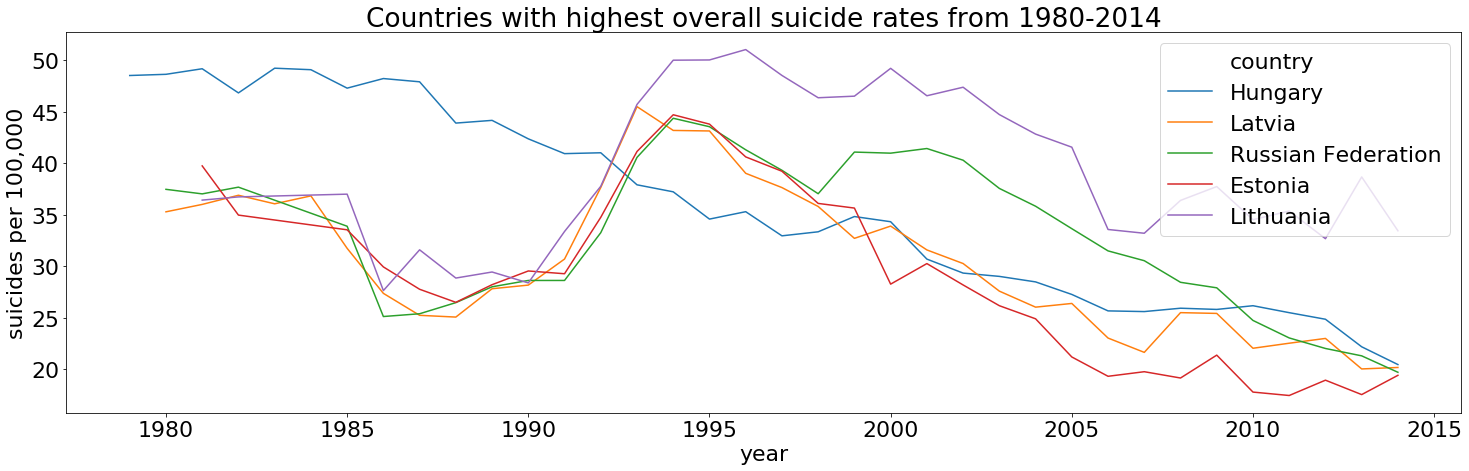

In [24]:
# pick countries with higest overall suicide rate per 100,000 in any year
top_countries_overall = both.sort_values(by="suicides per 100,000", ascending=False).drop_duplicates(subset=["country"], keep='first')
top_countries_overall = top_countries_overall.iloc[:5]["country"]

sample = both.loc[both["country"].isin(top_countries_overall), :]
sample.loc[sample["suicides per 100,000"] == 0, "suicides per 100,000"] = np.nan  # probably missing data

# make plot
fig = plt.figure(figsize=(25,7))
plt.title("Countries with highest overall suicide rates from 1980-2014")
sns.lineplot(x="year", y="suicides per 100,000", data=sample, hue="country");

## Low-suicide countries over the year

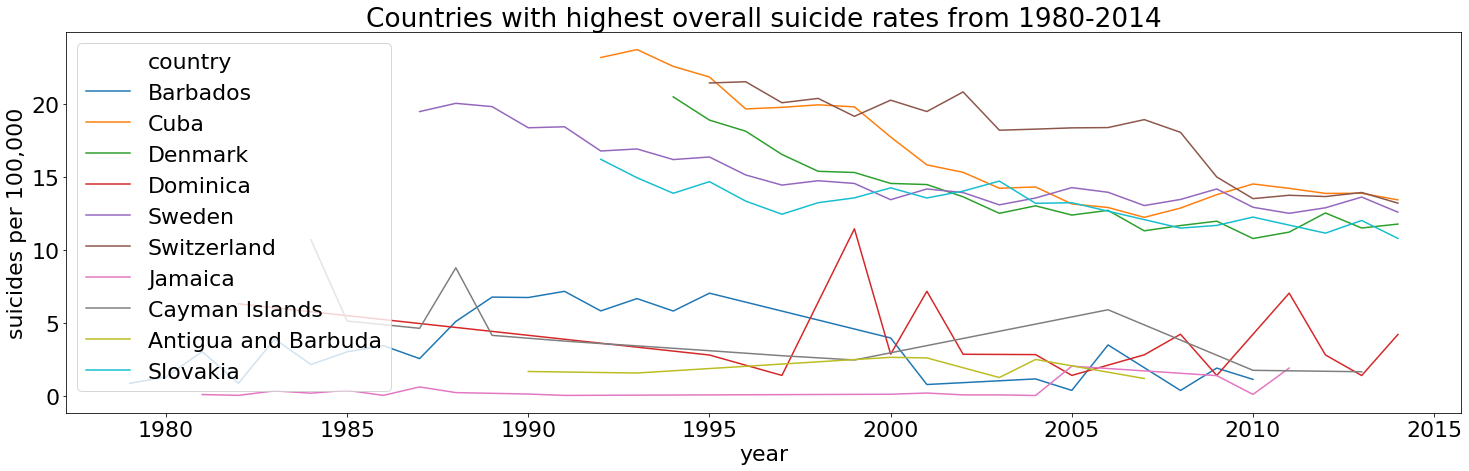

In [25]:
lowest_overall = both.sort_values(by="suicides per 100,000", ascending=True).drop_duplicates(subset=["country"], keep='first')
lowest_overall = lowest_overall.iloc[:10]["country"]

sample = both.loc[both["country"].isin(lowest_overall), :]
sample.loc[sample["suicides per 100,000"] == 0, "suicides per 100,000"] = np.nan  # probably missing data

# make plot
fig = plt.figure(figsize=(25,7))
plt.title("Countries with highest overall suicide rates from 1980-2014")
sns.lineplot(x="year", y="suicides per 100,000", data=sample, hue="country");

## Age range distribution
Interestingly, when looking at data from all countries together, it's the 75+ year olds who commit the most suicides (well, relatively speaking). Who would have though that? In Lithuania, however, the 35-54 year old age group (for men) shows highest suicide rates. 

In [17]:
df_with_age["suicides per 100,000"] = df_with_age["suicides_no"] / df_with_age["population"] * 100000

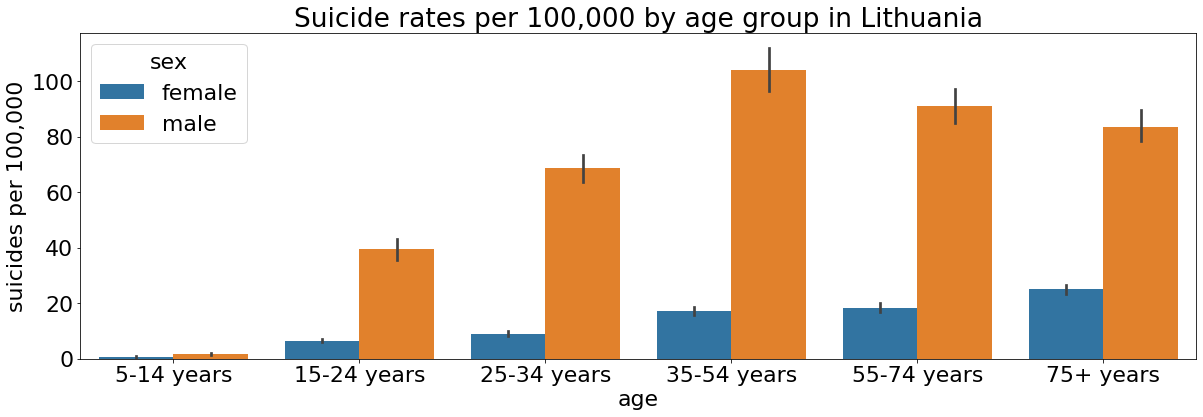

In [26]:
plt.figure(figsize=(20,6))
sns.barplot(x="age", 
            y="suicides per 100,000", 
            hue="sex", 
            data=df_with_age[df_with_age["country"] == "Lithuania"], 
            order=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
plt.title("Suicide rates per 100,000 by age group in Lithuania");

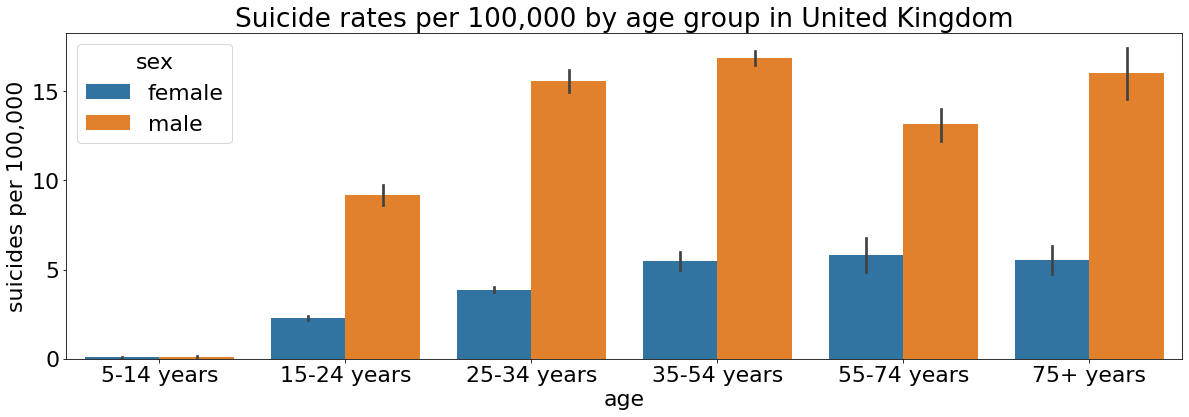

In [27]:
plt.figure(figsize=(20,6))
sns.barplot(x="age", 
            y="suicides per 100,000", 
            hue="sex", 
            data=df_with_age[df_with_age["country"] == "United Kingdom"], 
            order=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
plt.title("Suicide rates per 100,000 by age group in United Kingdom");

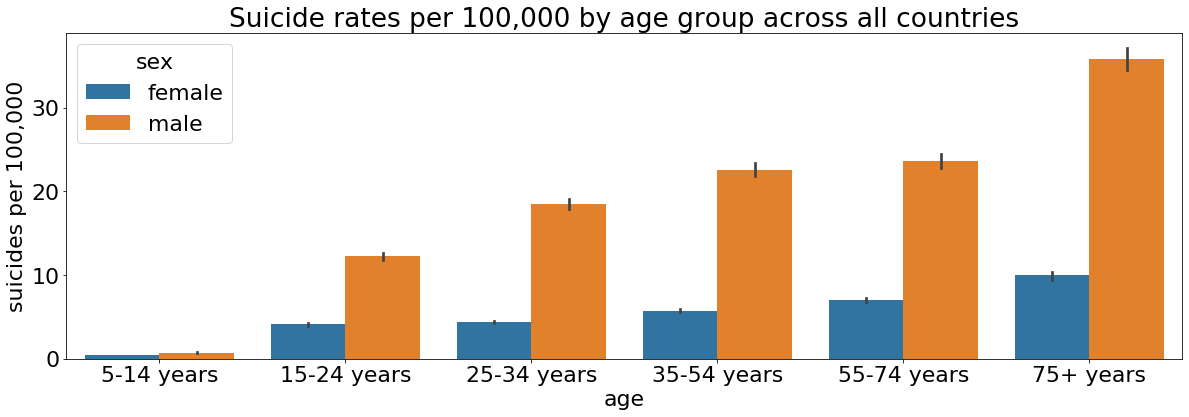

In [28]:
plt.figure(figsize=(20,6))
sns.barplot(x="age", 
            y="suicides per 100,000", 
            hue="sex", 
            data=df_with_age, 
            order=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
plt.title("Suicide rates per 100,000 by age group across all countries");